# Project: Image Restoration

### Introduction
This project explores methods for image restoration. We implement the Inverse Filter and the Wiener Filter by ourselves. 

The structure of this code include: 
- 0. Add motion blur and noise
- 1. Compare our filter and MATLAB built-in filters (very limited samples, an overview of our filters' performance)
- 2. Apply filters to reduce only the Gaussian noise
- 3. Apply Inverse filter to restore the motion blur only
- 4. Apply Wiener Filter to restore the motion blur + additive noise

### Team Members
- **Hongyu Zhou**  
  - Student ID: 6148123 
  - Email: hongyuzhou@tudelft.nl

- **Yuqi Zhang**  
  - Student ID: 6197728 
  - Email: yzhang114@tudelft.nl

---



In [88]:
% clean
clear all;

% Add directory
addpath('./codes');
addpath('./data');

% Load data
data = load('img_restoration.mat');

警告: 名称不存在或不是目录: D:\TUDelft\Q1\EE4C03 Statistical Digital Signal Processing and Modelling (202324 Q1) - 842024 - 813 AM\Project\projects2\Image_restoration\codes\.\codes
> 位置：path (第 109 行)
位置: addpath (第 86 行)
警告: 名称不存在或不是目录: D:\TUDelft\Q1\EE4C03 Statistical Digital Signal Processing and Modelling (202324 Q1) - 842024 - 813 AM\Project\projects2\Image_restoration\codes\.\data
> 位置：path (第 109 行)
位置: addpath (第 86 行)



## 0. Add Motion Blur Only, Gaussian Noise Only and Both
In this section, we add motion blur only, Gaussian Noise only and both to the images

In [110]:
% Parameters
gaussian_sigma = [0.1, 0.05, 0.01];       % Sigma values
gaussian_power = gaussian_sigma.^2;
motion_len = [10, 15, 20];              % Motion lengths
motion_theta = [0, 45, 90, 135];        % Motion angles

% Original images
I1 = data.I1;  
I2 = data.I2;
I1 = I1 / 255;          % Convert to double type
I2 = I2 / 255;

% Add Gaussian noise
gaussian_I1 = cell(length(gaussian_sigma));
gaussian_I1_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_I1{i} = imnoise(I1, 'gaussian', 0, gaussian_power(i));
    [gaussian_I1_snr(i, 1), gaussian_I1_snr(i, 2)] = psnr(gaussian_I1{i}, I1);
end
gaussian_I2 = cell(length(gaussian_sigma));
gaussian_I2_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_I2{i} = imnoise(I2, 'gaussian', 0, gaussian_power(i));
    [gaussian_I2_snr(i, 1), gaussian_I2_snr(i, 2)] = psnr(gaussian_I2{i}, I2);
end

% Create motion blur kernel
h_motions_len = cell(length(motion_len));
for i = 1:length(motion_len)
    h_motions_len{i} = fspecial('motion', motion_len(i), motion_theta(2));
end
h_motions_theta = cell(length(motion_theta));
for i = 1:length(motion_theta)
    h_motions_theta{i} = fspecial('motion', motion_len(2), motion_theta(i));
end

% Apply motion blur
motion_I1_len = cell(length(motion_len));
motion_I1_len_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_len)
    motion_I1_len{i} = imfilter(I1, h_motions_len{i}, 'conv', 'same', 'circular');
    [motion_I1_len_snr(i, 1), motion_I1_len_snr(i, 2)] = psnr(motion_I1_len{i}, I1);
end
motion_I1_theta = cell(length(motion_theta));
motion_I1_theta_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_theta)
    motion_I1_theta{i} = imfilter(I1, h_motions_theta{i}, 'conv', 'same', 'circular');
    [motion_I1_theta_snr(i, 1), motion_I1_theta_snr(i, 2)] = psnr(motion_I1_theta{i}, I1);
end

motion_I2_len = cell(length(motion_len));
motion_I2_len_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_len)
    motion_I2_len{i} = imfilter(I2, h_motions_len{i}, 'conv', 'same', 'circular');
    [motion_I2_len_snr(i, 1), motion_I2_len_snr(i, 2)] = psnr(motion_I2_len{i}, I2);
end
motion_I2_theta = cell(length(motion_theta));
motion_I2_theta_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_theta)
    motion_I2_theta{i} = imfilter(I2, h_motions_theta{i}, 'conv', 'same', 'circular');
    [motion_I2_theta_snr(i, 1), motion_I2_theta_snr(i, 2)] = psnr(motion_I2_theta{i}, I2);
end

% Gaussian + motion-blurred images
gaussian_motion_I1 = cell(length(gaussian_sigma));
gaussian_motion_I1_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_motion_I1{i} = imnoise(motion_I1_len{1}, 'gaussian', 0, gaussian_power(i));
    [gaussian_motion_I1_snr(i, 1), gaussian_motion_I1_snr(i, 2)] = psnr(gaussian_motion_I1{i}, I1);
end
gaussian_motion_I2 = cell(length(gaussian_sigma));
gaussian_motion_I2_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_motion_I2{i} = imnoise(motion_I2_len{1}, 'gaussian', 0, gaussian_power(i));
    [gaussian_motion_I2_snr(i, 1), gaussian_motion_I2_snr(i, 2)] = psnr(gaussian_motion_I2{i}, I2);
end


Show the Gaussian-noised Images

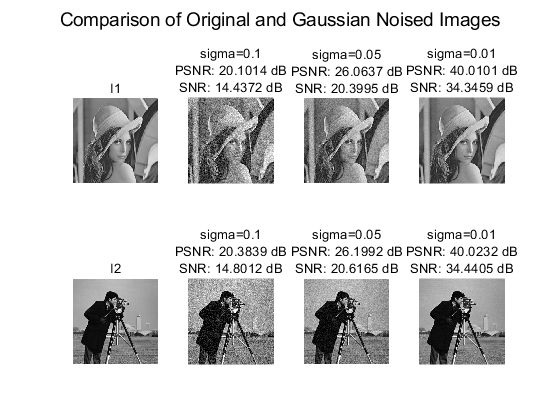

In [111]:
% Display original and Gaussian-noised images
figure;

% Set font size
font_size = 10;

% I1 image and its Gaussian-noised versions
subplot(2,4,1), imshow(I1), title('I1', 'FontSize', font_size);
subplot(2,4,2), imshow(gaussian_I1{1}), title({...
    'sigma=0.1', ...
    ['PSNR: ', num2str(gaussian_I1_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I1_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(gaussian_I1{2}), title({...
    'sigma=0.05', ...
    ['PSNR: ', num2str(gaussian_I1_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I1_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(gaussian_I1{3}), title({...
    'sigma=0.01', ...
    ['PSNR: ', num2str(gaussian_I1_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I1_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% I2 image and its Gaussian-noised versions
subplot(2,4,5), imshow(I2), title('I2', 'FontSize', font_size);
subplot(2,4,6), imshow(gaussian_I2{1}), title({...
    'sigma=0.1', ...
    ['PSNR: ', num2str(gaussian_I2_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I2_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(gaussian_I2{2}), title({...
    'sigma=0.05', ...
    ['PSNR: ', num2str(gaussian_I2_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I2_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(gaussian_I2{3}), title({...
    'sigma=0.01', ...
    ['PSNR: ', num2str(gaussian_I2_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I2_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% Add main title
sgtitle('Comparison of Original and Gaussian Noised Images', 'FontSize', 14);


Show the motion blurred images with different motion blur length and angles. Indicate the PSNR and SNR

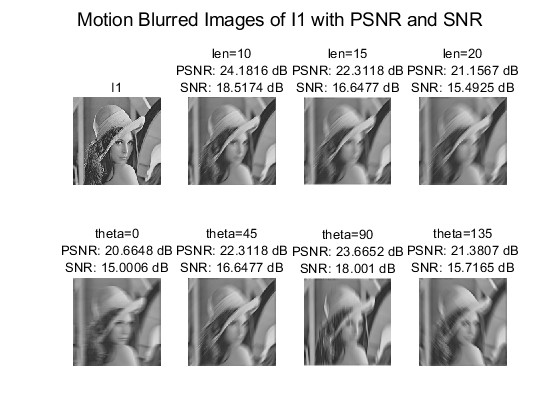

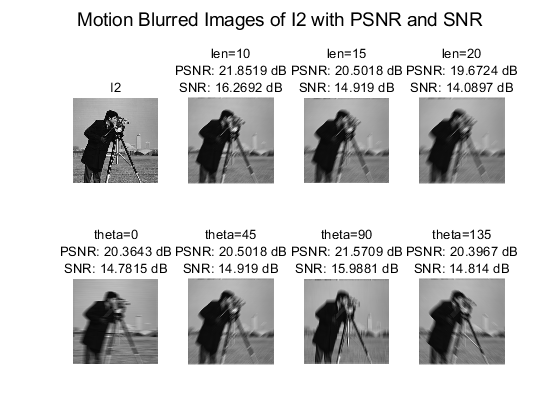

In [112]:
% Display the original and motion-blurred I1 images
figure;

% Set font size
font_size = 10;

% Display original image and motion-blurred versions
subplot(2,4,1), imshow(I1), title('I1', 'FontSize', font_size);
subplot(2,4,2), imshow(motion_I1_len{1}), title({...
    'len=10', ...
    ['PSNR: ', num2str(motion_I1_len_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_len_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(motion_I1_len{2}), title({...
    'len=15', ...
    ['PSNR: ', num2str(motion_I1_len_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_len_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(motion_I1_len{3}), title({...
    'len=20', ...
    ['PSNR: ', num2str(motion_I1_len_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_len_snr(3, 2)), ' dB']}, 'FontSize', font_size);

subplot(2,4,5), imshow(motion_I1_theta{1}), title({...
    'theta=0', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,6), imshow(motion_I1_theta{2}), title({...
    'theta=45', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(motion_I1_theta{3}), title({...
    'theta=90', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(3, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(motion_I1_theta{4}), title({...
    'theta=135', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(4, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(4, 2)), ' dB']}, 'FontSize', font_size);

% Add main title
sgtitle('Motion Blurred Images of I1 with PSNR and SNR', 'FontSize', 14);

% Display the original and motion-blurred I2 images
figure;

% Set font size
font_size = 10;

% Display original image and motion-blurred versions
subplot(2,4,1), imshow(I2), title('I2', 'FontSize', font_size);
subplot(2,4,2), imshow(motion_I2_len{1}), title({...
    'len=10', ...
    ['PSNR: ', num2str(motion_I2_len_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_len_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(motion_I2_len{2}), title({...
    'len=15', ...
    ['PSNR: ', num2str(motion_I2_len_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_len_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(motion_I2_len{3}), title({...
    'len=20', ...
    ['PSNR: ', num2str(motion_I2_len_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_len_snr(3, 2)), ' dB']}, 'FontSize', font_size);

subplot(2,4,5), imshow(motion_I2_theta{1}), title({...
    'theta=0', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,6), imshow(motion_I2_theta{2}), title({...
    'theta=45', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(motion_I2_theta{3}), title({...
    'theta=90', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(3, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(motion_I2_theta{4}), title({...
    'theta=135', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(4, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(4, 2)), ' dB']}, 'FontSize', font_size);

% Add main title
sgtitle('Motion Blurred Images of I2 with PSNR and SNR', 'FontSize', 14);


Show the blurred images (motion blur + Gaussian noise). Indicate the PSNR and SNR

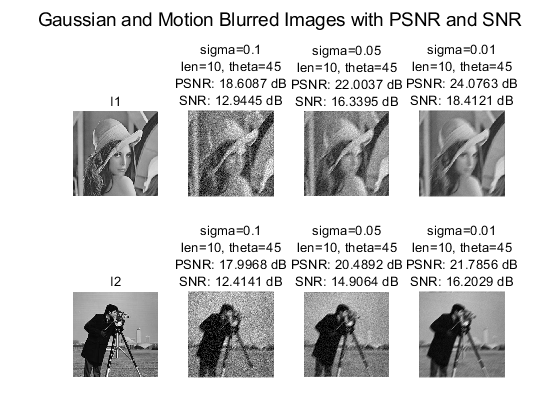

In [113]:
% Display original images and images with Gaussian noise and motion blur
figure;

% Set font size
font_size = 10;

% Display I1 image with Gaussian noise + motion blur
subplot(2,4,1), imshow(I1), title('I1', 'FontSize', font_size);
subplot(2,4,2), imshow(gaussian_motion_I1{1}), title({...
    'sigma=0.1', ...
    'len=10, theta=45', ...  % len and theta on the same line
    ['PSNR: ', num2str(gaussian_motion_I1_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I1_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(gaussian_motion_I1{2}), title({...
    'sigma=0.05', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I1_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I1_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(gaussian_motion_I1{3}), title({...
    'sigma=0.01', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I1_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I1_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% Display I2 image with Gaussian noise + motion blur
subplot(2,4,5), imshow(I2), title('I2', 'FontSize', font_size);
subplot(2,4,6), imshow(gaussian_motion_I2{1}), title({...
    'sigma=0.1', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I2_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I2_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(gaussian_motion_I2{2}), title({...
    'sigma=0.05', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I2_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I2_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(gaussian_motion_I2{3}), title({...
    'sigma=0.01', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I2_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I2_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% Add main title
sgtitle('Gaussian and Motion Blurred Images with PSNR and SNR', 'FontSize', 14);


## 1. Implement of the filters
We will first implement the inverse filter and Wiener filter by ourselves. Note that **our Inverse Filter and Wiener Filter source codes are in the corresponding provided .m files**


The result will be compared with those from the built-in functions provided by Matlab.


### 1.1 Test implemented inverse filter

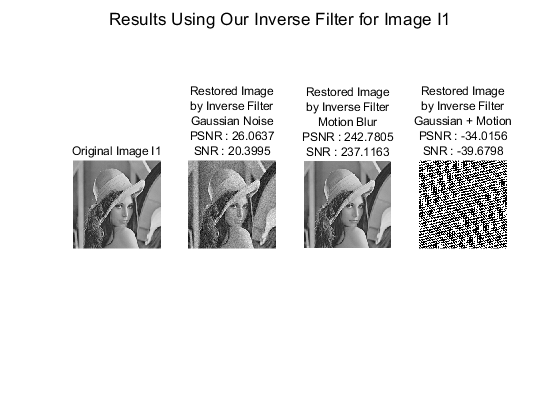

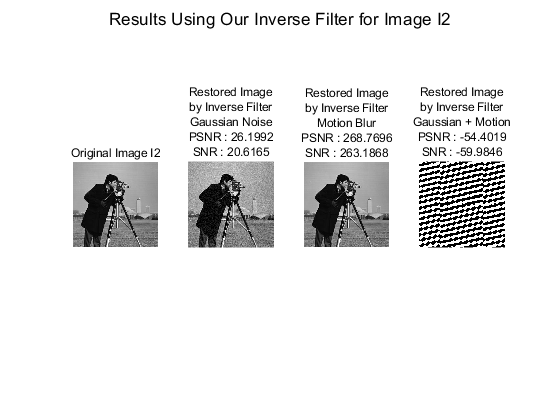

In [114]:
% The results of implemented inverse filters
unmodified_kernal = zeros(3);
unmodified_kernal(2, 2) = 1;

% Inverse filter for I1
% Show the results
figure;
sgtitle('Results Using Our Inverse Filter for Image I1');
subplot(1, 4, 1); imshow(I1); title('Original Image I1');

restore_img_I1 = inverse_filter(unmodified_kernal, gaussian_I1{2});             % inverse_filter() please see our source code. We write the inverse filter in the .m file
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by Inverse Filter', ...
    'Gaussian Noise', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = inverse_filter(h_motions_len{2}, motion_I1_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by Inverse Filter', ...
    'Motion Blur', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = inverse_filter(h_motions_len{1}, gaussian_motion_I1{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by Inverse Filter', ...
    'Gaussian + Motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Inverse filter for I2
% Show the results
figure;
sgtitle('Results Using Our Inverse Filter for Image I2');
subplot(1, 4, 1); imshow(I2); title('Original Image I2');

restore_img_I2 = inverse_filter(unmodified_kernal, gaussian_I2{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by Inverse Filter', ...
    'Gaussian Noise', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = inverse_filter(h_motions_len{2}, motion_I2_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by Inverse Filter', ...
    'Motion Blur', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = inverse_filter(h_motions_len{1}, gaussian_motion_I2{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by Inverse Filter', ...
    'Gaussian + Motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});


### 1.2 Test implemented Wiener filter

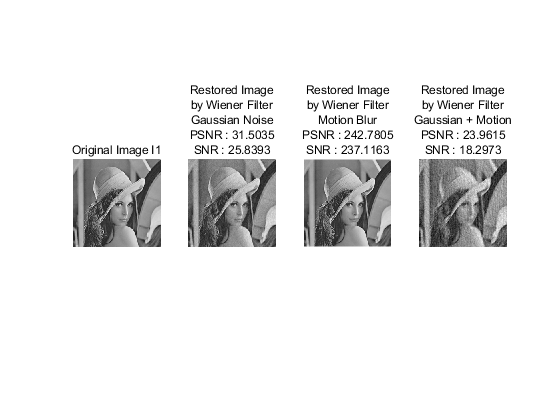

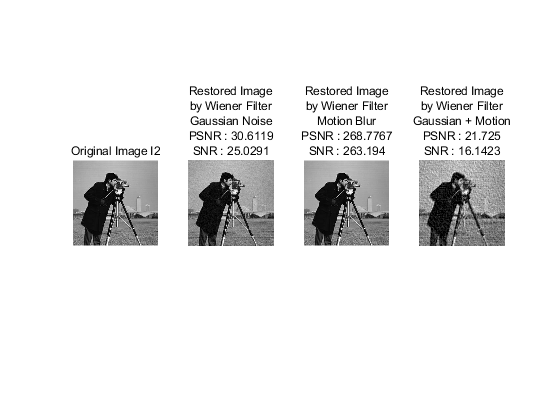

In [94]:
% The results of implemented Wiener filters

% Wiener filter for I1
% Show the results
figure;
sgtitle('Results Using Our Wiener Filter for Image I1'); 
subplot(1, 4, 1); imshow(I1); title('Original Image I1');

restore_img_I1 = wiener_filter(gaussian_I1{2}, I1, gaussian_I1{2} - I1, unmodified_kernal);         % inverse_filter() please see our source code. We write the Wiener filter in the .m file
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by Wiener Filter', ...
    'Gaussian Noise', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = wiener_filter(motion_I1_len{2}, I1, zeros(size(I1)), h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by Wiener Filter', ...
    'Motion Blur', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = wiener_filter(gaussian_motion_I1{2}, I1, gaussian_I1{2} - I1, h_motions_len{1});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by Wiener Filter', ...
    'Gaussian + Motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Wiener filter for I2
% Show the results
figure;
sgtitle('Results Using Our Wiener Filter for Image I2');
subplot(1, 4, 1); imshow(I2); title('Original Image I2');

restore_img_I2 = wiener_filter(gaussian_I2{2}, I2, gaussian_I2{2} - I2, unmodified_kernal);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by Wiener Filter', ...
    'Gaussian Noise', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = wiener_filter(motion_I2_len{2}, I2, zeros(size(I2)), h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by Wiener Filter', ...
    'Motion Blur', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = wiener_filter(gaussian_motion_I2{2}, I2, gaussian_I2{2} - I2, h_motions_len{1});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by Wiener Filter', ...
    'Gaussian + Motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});


### 1.3 Apply built-in Matlab wiener filter to images
We will apply the MATLAB built-in function wiener2() and deconvwnr(). We want to compare the results using our Inverse Filter and Wiener Filter with the MATLAB built-in functions

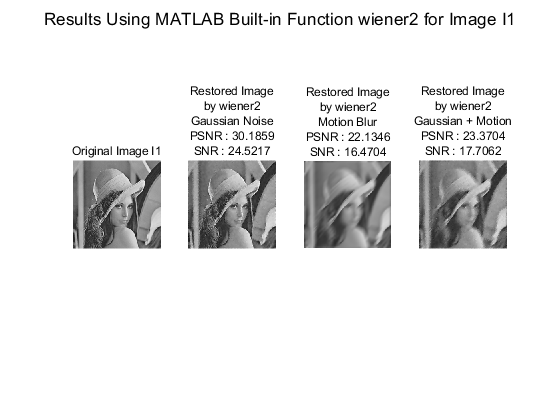

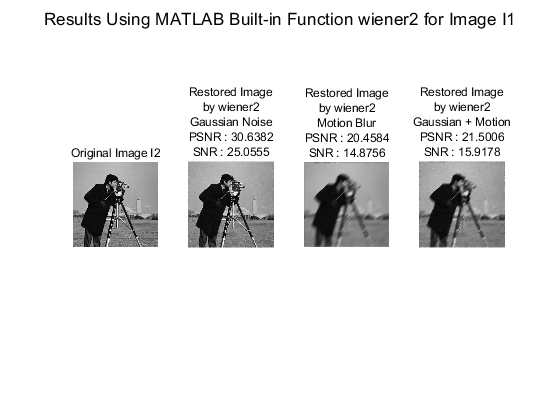

In [95]:
% Using built-in functions in Matlab

% Wiener filter wiener2 for I1
% Show results
figure;
sgtitle('Results Using MATLAB Built-in Function wiener2 for Image I1'); 
subplot(1, 4, 1); imshow(I1); title('Original Image I1');

% Restore image using Wiener filter for Gaussian noise
restore_img_I1 = wiener2(gaussian_I1{2}, [5, 5], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by wiener2', ...
    'Gaussian Noise', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Restore image using Wiener filter for Motion blur
restore_img_I1 = wiener2(motion_I1_len{2}, [5, 5]);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by wiener2', ...
    'Motion Blur', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Restore image using Wiener filter for Gaussian + Motion blur
restore_img_I1 = wiener2(gaussian_motion_I1{2}, [5, 5], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by wiener2', ...
    'Gaussian + Motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Wiener filter wiener2 for I2
% Show results
figure;
sgtitle('Results Using MATLAB Built-in Function wiener2 for Image I1'); 
subplot(1, 4, 1); imshow(I2); title('Original Image I2');

% Restore image using Wiener filter for Gaussian noise
restore_img_I2 = wiener2(gaussian_I2{2}, [5, 5], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by wiener2', ...
    'Gaussian Noise', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Restore image using Wiener filter for Motion blur
restore_img_I2 = wiener2(motion_I2_len{2}, [5, 5]);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by wiener2', ...
    'Motion Blur', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Restore image using Wiener filter for Gaussian + Motion blur
restore_img_I2 = wiener2(gaussian_motion_I2{2}, [5, 5], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by wiener2', ...
    'Gaussian + Motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});


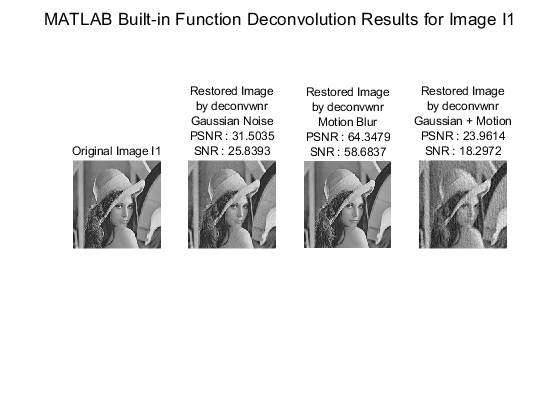

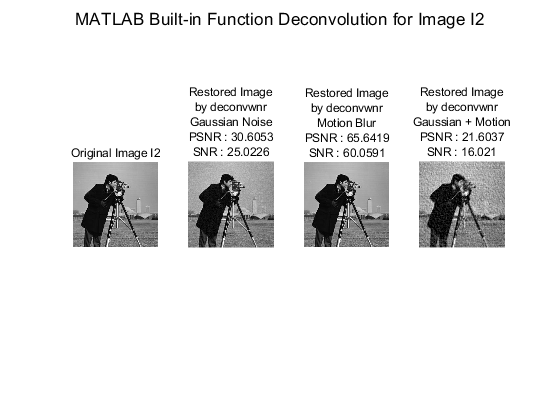

In [96]:
% Wiener filtering using deconvwnr for Image I1
% signal_var = var(I1(:));
% NSR = gaussian_power(2) / signal_var;

% Calculate noise power spectrum and image power spectrum
[M, N] = size(I1);
noise_power_spectrum = abs(fft2(gaussian_I1{2} - I1, M, N)).^2;  % Noise power spectrum
image_power_spectrum = abs(fft2(I1, M, N)).^2;        % Power spectrum of the original image
NSR = noise_power_spectrum ./ (image_power_spectrum); % Calculate NSR (Noise-to-Signal Ratio)

% Display results
figure;
sgtitle('MATLAB Built-in Function Deconvolution Results for Image I1'); % Main title for the figure
subplot(1, 4, 1); imshow(I1); title('Original Image I1');

% Restore image using deconvolution for Gaussian noise
restore_img_I1 = deconvwnr(gaussian_I1{2}, unmodified_kernal, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by deconvwnr', ...
    'Gaussian Noise', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Restore image using deconvolution for Motion blur
restore_img_I1 = deconvwnr(motion_I1_len{2}, h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by deconvwnr', ...
    'Motion Blur', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Restore image using deconvolution for Gaussian + Motion blur
restore_img_I1 = deconvwnr(gaussian_motion_I1{2}, h_motions_len{1}, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({...
    'Restored Image', ...
    'by deconvwnr', ...
    'Gaussian + Motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Wiener filtering using deconvwnr for Image I2
% signal_var = var(I2(:));
% NSR = gaussian_power(2) / signal_var;

% Calculate noise power spectrum and image power spectrum
[M, N] = size(I2);
noise_power_spectrum = abs(fft2(gaussian_I2{2} - I2, M, N)).^2;  % Noise power spectrum
image_power_spectrum = abs(fft2(I2, M, N)).^2;        % Power spectrum of the original image
NSR = noise_power_spectrum ./ (image_power_spectrum); % Calculate NSR (Noise-to-Signal Ratio)

% Display results
figure;
sgtitle('MATLAB Built-in Function Deconvolution for Image I2'); % Main title for the figure
subplot(1, 4, 1); imshow(I2); title('Original Image I2');

% Restore image using deconvolution for Gaussian noise
restore_img_I2 = deconvwnr(gaussian_I2{2}, unmodified_kernal, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by deconvwnr', ...
    'Gaussian Noise', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Restore image using deconvolution for Motion blur
restore_img_I2 = deconvwnr(motion_I2_len{2}, h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by deconvwnr', ...
    'Motion Blur', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% Restore image using deconvolution for Gaussian + Motion blur
restore_img_I2 = deconvwnr(gaussian_motion_I2{2}, h_motions_len{1}, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({...
    'Restored Image', ...
    'by deconvwnr', ...
    'Gaussian + Motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});


## 2. Gaussian noise
In this part, we first focus on the Gaussian Noise only. We will use different filters, including median filters, mean filters, Gaussian filters, bilateral filters, inverse filters and Wiener filters to try to remove the Gaussian noise. For each filter we will apply different window sizes and compare their results. For the result, we will use PSNR to measure the restoration quality. And we will discuss the result also based on the grayscale histogram and spectrum. 


### 2.1 Median filter

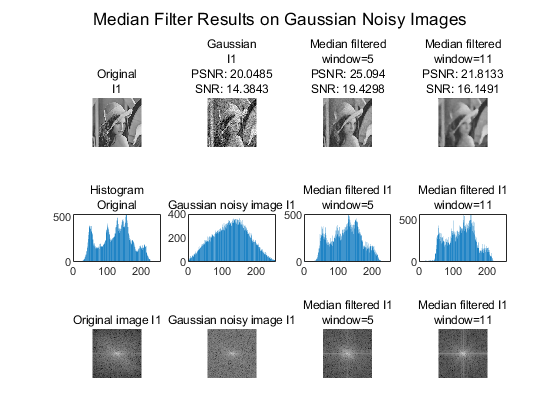

In [97]:
window_size = [5, 11];

% Median filters
median_I1 = cell(length(window_size));
median_snr = zeros(length(window_size), 2);
for i = 1:length(window_size)
    median_I1{i} = medfilt2(gaussian_I1{1}, [window_size(i), window_size(i)]);
    [median_snr(i, 1), median_snr(i, 2)] = psnr(median_I1{i}, I1);
end

% Show the results of median filters
figure;
sgtitle('Median Filter Results on Gaussian Noisy Images'); % Overall title

subplot(3, 4, 1); 
imshow(I1); 
title({"Original", "I1"});

subplot(3, 4, 2); 
imshow(gaussian_I1{1}); 
title({"Gaussian", "I1", ...
       ['PSNR: ', num2str(gaussian_I1_snr(1, 1))], ...
       ['SNR: ', num2str(gaussian_I1_snr(1, 2))]});

subplot(3, 4, 3); 
imshow(median_I1{1}); 
title({"Median filtered", "window=5", ...
       ['PSNR: ', num2str(median_snr(1, 1))], ...
       ['SNR: ', num2str(median_snr(1, 2))]});

subplot(3, 4, 4); 
imshow(median_I1{2}); 
title({"Median filtered", "window=11", ...
       ['PSNR: ', num2str(median_snr(2, 1))], ...
       ['SNR: ', num2str(median_snr(2, 2))]});

subplot(3, 4, 5); 
bar(imhist(I1)); 
title({"Histogram", "Original"});

subplot(3, 4, 6); 
bar(imhist(gaussian_I1{1})); 
title({"Gaussian noisy image I1"});

subplot(3, 4, 7); 
bar(imhist(median_I1{1})); 
title({"Median filtered I1", "window=5"});

subplot(3, 4, 8); 
bar(imhist(median_I1{2})); 
title({"Median filtered I1", "window=11"});

subplot(3, 4, 9); 
imshow(to_frequency(I1), []); 
title({"Original image I1"});

subplot(3, 4, 10); 
imshow(to_frequency(gaussian_I1{1}), []); 
title({"Gaussian noisy image I1"});

subplot(3, 4, 11); 
imshow(to_frequency(median_I1{1}), []); 
title({"Median filtered I1", "window=5"});

subplot(3, 4, 12); 
imshow(to_frequency(median_I1{2}), []); 
title({"Median filtered I1", "window=11"});

### 2.2 Mean filter

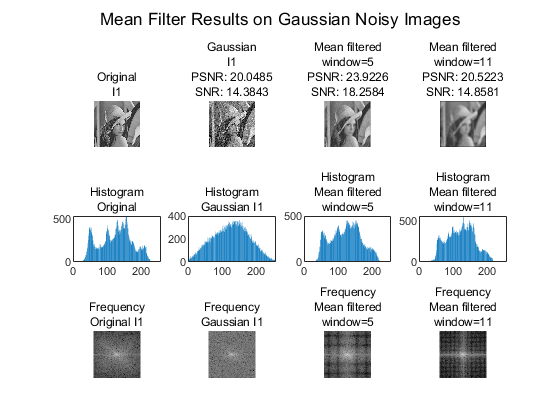

In [98]:
% Mean filters
mean_I1 = cell(length(window_size));
mean_snr = zeros(length(window_size), 2);
for i = 1:length(window_size)
    mean_I1{i} = imfilter(gaussian_I1{1}, fspecial("average", window_size(i)));
    [mean_snr(i, 1), mean_snr(i, 2)] = psnr(mean_I1{i}, I1);
end

% Show the results of mean filters
figure;
sgtitle('Mean Filter Results on Gaussian Noisy Images'); % Overall title

subplot(3, 4, 1); 
imshow(I1); 
title({"Original", "I1"});

subplot(3, 4, 2); 
imshow(gaussian_I1{1}); 
title({"Gaussian", "I1", ...
       ['PSNR: ', num2str(gaussian_I1_snr(1, 1))], ...
       ['SNR: ', num2str(gaussian_I1_snr(1, 2))]});

subplot(3, 4, 3); 
imshow(mean_I1{1}); 
title({"Mean filtered", "window=5", ...
       ['PSNR: ', num2str(mean_snr(1, 1))], ...
       ['SNR: ', num2str(mean_snr(1, 2))]});

subplot(3, 4, 4); 
imshow(mean_I1{2}); 
title({"Mean filtered", "window=11", ...
       ['PSNR: ', num2str(mean_snr(2, 1))], ...
       ['SNR: ', num2str(mean_snr(2, 2))]});

subplot(3, 4, 5); 
bar(imhist(I1)); 
title({"Histogram", "Original"});

subplot(3, 4, 6); 
bar(imhist(gaussian_I1{1})); 
title({"Histogram", "Gaussian I1"});

subplot(3, 4, 7); 
bar(imhist(mean_I1{1})); 
title({"Histogram", "Mean filtered", "window=5"});

subplot(3, 4, 8); 
bar(imhist(mean_I1{2})); 
title({"Histogram", "Mean filtered", "window=11"});

subplot(3, 4, 9); 
imshow(to_frequency(I1), []); 
title({"Frequency", "Original I1"});

subplot(3, 4, 10); 
imshow(to_frequency(gaussian_I1{1}), []); 
title({"Frequency", "Gaussian I1"});

subplot(3, 4, 11); 
imshow(to_frequency(mean_I1{1}), []); 
title({"Frequency", "Mean filtered", "window=5"});

subplot(3, 4, 12); 
imshow(to_frequency(mean_I1{2}), []); 
title({"Frequency", "Mean filtered", "window=11"});

### 2.3 Gaussian filter

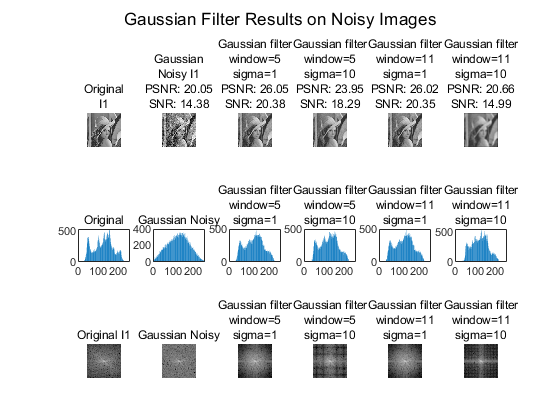

In [99]:
% Gaussian filters
sigma = [1, 10];
gau_filtered_len = length(window_size) * length(sigma);
gaussian_filtered_I1 = cell(gau_filtered_len);
gaussian_filtered_snr = zeros(gau_filtered_len, 2);
for i = 1:length(window_size)
    for j = 1:length(sigma)
        index = (i-1) * length(sigma) + j;
        gaussian_filtered_I1{index} = imfilter(gaussian_I1{1}, fspecial("gaussian", window_size(i), sigma(j)));
        [gaussian_filtered_snr(index, 1), gaussian_filtered_snr(index, 2)] = psnr(gaussian_filtered_I1{index}, I1);
    end
end

% Show the results of gaussian filters
figure;
sgtitle('Gaussian Filter Results on Noisy Images'); % Overall title

subplot(3, 6, 1); 
imshow(I1); 
title({"Original", "I1"});

subplot(3, 6, 2); 
imshow(gaussian_I1{1}); 
title({"Gaussian", "Noisy I1", ...
       ['PSNR: ', num2str(gaussian_I1_snr(1, 1), '%.2f')], ...
       ['SNR: ', num2str(gaussian_I1_snr(1, 2), '%.2f')]});

subplot(3, 6, 3); 
imshow(gaussian_filtered_I1{1}); 
title({"Gaussian filter", "window=5", "sigma=1", ...
       ['PSNR: ', num2str(gaussian_filtered_snr(1, 1), '%.2f')], ...
       ['SNR: ', num2str(gaussian_filtered_snr(1, 2), '%.2f')]});

subplot(3, 6, 4); 
imshow(gaussian_filtered_I1{2}); 
title({"Gaussian filter", "window=5", "sigma=10", ...
       ['PSNR: ', num2str(gaussian_filtered_snr(2, 1), '%.2f')], ...
       ['SNR: ', num2str(gaussian_filtered_snr(2, 2), '%.2f')]});

subplot(3, 6, 5); 
imshow(gaussian_filtered_I1{3}); 
title({"Gaussian filter", "window=11", "sigma=1", ...
       ['PSNR: ', num2str(gaussian_filtered_snr(3, 1), '%.2f')], ...
       ['SNR: ', num2str(gaussian_filtered_snr(3, 2), '%.2f')]});

subplot(3, 6, 6); 
imshow(gaussian_filtered_I1{4}); 
title({"Gaussian filter", "window=11", "sigma=10", ...
       ['PSNR: ', num2str(gaussian_filtered_snr(4, 1), '%.2f')], ...
       ['SNR: ', num2str(gaussian_filtered_snr(4, 2), '%.2f')]});

subplot(3, 6, 7); 
bar(imhist(I1)); 
title({"Original"});

subplot(3, 6, 8); 
bar(imhist(gaussian_I1{1})); 
title({"Gaussian Noisy"});

subplot(3, 6, 9); 
bar(imhist(gaussian_filtered_I1{1})); 
title({"Gaussian filter", "window=5", "sigma=1"});

subplot(3, 6, 10); 
bar(imhist(gaussian_filtered_I1{2})); 
title({"Gaussian filter", "window=5", "sigma=10"});

subplot(3, 6, 11); 
bar(imhist(gaussian_filtered_I1{3})); 
title({"Gaussian filter", "window=11", "sigma=1"});

subplot(3, 6, 12); 
bar(imhist(gaussian_filtered_I1{4})); 
title({"Gaussian filter", "window=11", "sigma=10"});

subplot(3, 6, 13); 
imshow(to_frequency(I1), []); 
title({"Original I1"});

subplot(3, 6, 14); 
imshow(to_frequency(gaussian_I1{1}), []); 
title({"Gaussian Noisy"});

subplot(3, 6, 15); 
imshow(to_frequency(gaussian_filtered_I1{1}), []); 
title({"Gaussian filter", "window=5", "sigma=1"});

subplot(3, 6, 16); 
imshow(to_frequency(gaussian_filtered_I1{2}), []); 
title({"Gaussian filter", "window=5", "sigma=10"});

subplot(3, 6, 17); 
imshow(to_frequency(gaussian_filtered_I1{3}), []); 
title({"Gaussian filter", "window=11", "sigma=1"});

subplot(3, 6, 18); 
imshow(to_frequency(gaussian_filtered_I1{4}), []); 
title({"Gaussian filter", "window=11", "sigma=10"});

### 2.4 Bilateral filter

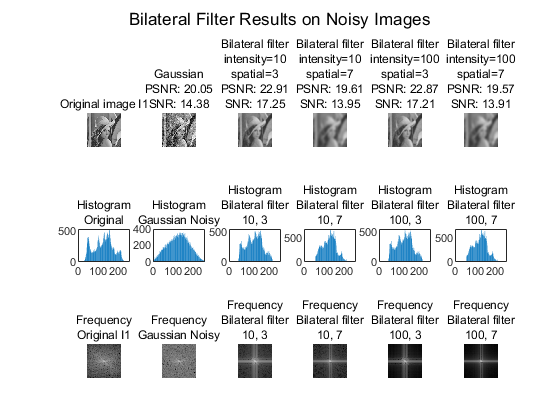

In [100]:
% Bilateral filters
intensity_sigma = [10, 100];
spatial_sigma = [3, 7];
bil_filtered_len = length(intensity_sigma) * length(spatial_sigma);
bil_filtered_I1 = cell(bil_filtered_len);
bil_filtered_snr = zeros(bil_filtered_len, 2);
for i = 1:length(intensity_sigma)
    for j = 1:length(spatial_sigma)
        index = (i-1) * length(spatial_sigma) + j;
        bil_filtered_I1{index} = imbilatfilt(gaussian_I1{1}, intensity_sigma(i), spatial_sigma(j));
        [bil_filtered_snr(index, 1), bil_filtered_snr(index, 2)] = psnr(bil_filtered_I1{index}, I1);
    end
end

% Show the results of bilateral filters
figure;
sgtitle('Bilateral Filter Results on Noisy Images'); % Overall title

subplot(3, 6, 1); 
imshow(I1); 
title("Original image I1");

subplot(3, 6, 2); 
imshow(gaussian_I1{1}); 
title({"Gaussian", ...
       ['PSNR: ', num2str(gaussian_I1_snr(1, 1), '%.2f')], ...
       ['SNR: ', num2str(gaussian_I1_snr(1, 2), '%.2f')]});

subplot(3, 6, 3); 
imshow(bil_filtered_I1{1}); 
title({"Bilateral filter", "intensity=10", "spatial=3", ...
       ['PSNR: ', num2str(bil_filtered_snr(1, 1), '%.2f')], ...
       ['SNR: ', num2str(bil_filtered_snr(1, 2), '%.2f')]});

subplot(3, 6, 4); 
imshow(bil_filtered_I1{2}); 
title({"Bilateral filter", "intensity=10", "spatial=7", ...
       ['PSNR: ', num2str(bil_filtered_snr(2, 1), '%.2f')], ...
       ['SNR: ', num2str(bil_filtered_snr(2, 2), '%.2f')]});

subplot(3, 6, 5); 
imshow(bil_filtered_I1{3}); 
title({"Bilateral filter", "intensity=100", "spatial=3", ...
       ['PSNR: ', num2str(bil_filtered_snr(3, 1), '%.2f')], ...
       ['SNR: ', num2str(bil_filtered_snr(3, 2), '%.2f')]});

subplot(3, 6, 6); 
imshow(bil_filtered_I1{4}); 
title({"Bilateral filter", "intensity=100", "spatial=7", ...
       ['PSNR: ', num2str(bil_filtered_snr(4, 1), '%.2f')], ...
       ['SNR: ', num2str(bil_filtered_snr(4, 2), '%.2f')]});

subplot(3, 6, 7); 
bar(imhist(I1));
title({"Histogram", "Original"});

subplot(3, 6, 8); 
bar(imhist(gaussian_I1{1}));
title({"Histogram", "Gaussian Noisy"});

subplot(3, 6, 9); 
bar(imhist(bil_filtered_I1{1}));
title({"Histogram", "Bilateral filter", "10, 3"});

subplot(3, 6, 10); 
bar(imhist(bil_filtered_I1{2}));
title({"Histogram", "Bilateral filter", "10, 7"});

subplot(3, 6, 11); 
bar(imhist(bil_filtered_I1{3}));
title({"Histogram", "Bilateral filter", "100, 3"});

subplot(3, 6, 12); 
bar(imhist(bil_filtered_I1{4}));
title({"Histogram", "Bilateral filter", "100, 7"});

subplot(3, 6, 13); 
imshow(to_frequency(I1), []);
title({"Frequency", "Original I1"});

subplot(3, 6, 14); 
imshow(to_frequency(gaussian_I1{1}), []);
title({"Frequency", "Gaussian Noisy"});

subplot(3, 6, 15); 
imshow(to_frequency(bil_filtered_I1{1}), []);
title({"Frequency", "Bilateral filter", "10, 3"});

subplot(3, 6, 16); 
imshow(to_frequency(bil_filtered_I1{2}), []);
title({"Frequency", "Bilateral filter", "10, 7"});

subplot(3, 6, 17); 
imshow(to_frequency(bil_filtered_I1{3}), []);
title({"Frequency", "Bilateral filter", "100, 3"});

subplot(3, 6, 18); 
imshow(to_frequency(bil_filtered_I1{4}), []);
title({"Frequency", "Bilateral filter", "100, 7"});

### 2.5 Inverse filter

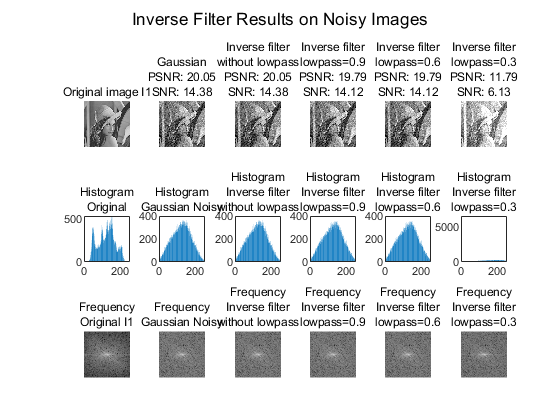

In [101]:
% Inverse filters
inverse_wpass = [0.9, 0.6, 0.3];
inverse_filtered_len = length(inverse_wpass) + 1;
inverse_filtered_I1 = cell(inverse_filtered_len);
inverse_filtered_snr = zeros(inverse_filtered_len, 2);

inverse_filtered_I1{1} = inverse_filter(unmodified_kernal, gaussian_I1{1});
[inverse_filtered_snr(1, 1), inverse_filtered_snr(1, 2)] = psnr(inverse_filtered_I1{1}, I1);
for i = 2:inverse_filtered_len
    inverse_filtered_I1{i} = inverse_filter(unmodified_kernal, gaussian_I1{1}, inverse_wpass(i-1));
    [inverse_filtered_snr(i, 1), inverse_filtered_snr(i, 2)] = psnr(inverse_filtered_I1{i}, I1);
end

% Show the results of inverse filters
figure;
sgtitle('Inverse Filter Results on Noisy Images'); % Overall title

subplot(3, 6, 1); 
imshow(I1); 
title("Original image I1");

subplot(3, 6, 2); 
imshow(gaussian_I1{1}); 
title({"Gaussian", ...
    ['PSNR: ', num2str(gaussian_I1_snr(1, 1), '%.2f')], ...
    ['SNR: ', num2str(gaussian_I1_snr(1, 2), '%.2f')]});

subplot(3, 6, 3); 
imshow(inverse_filtered_I1{1}); 
title({"Inverse filter", "without lowpass", ...
    ['PSNR: ', num2str(inverse_filtered_snr(1, 1), '%.2f')], ...
    ['SNR: ', num2str(inverse_filtered_snr(1, 2), '%.2f')]});

subplot(3, 6, 4); 
imshow(inverse_filtered_I1{2}); 
title({"Inverse filter", "lowpass=0.9", ...
    ['PSNR: ', num2str(inverse_filtered_snr(2, 1), '%.2f')], ...
    ['SNR: ', num2str(inverse_filtered_snr(2, 2), '%.2f')]});

subplot(3, 6, 5); 
imshow(inverse_filtered_I1{3}); 
title({"Inverse filter", "lowpass=0.6", ...
    ['PSNR: ', num2str(inverse_filtered_snr(3, 1), '%.2f')], ...
    ['SNR: ', num2str(inverse_filtered_snr(3, 2), '%.2f')]});

subplot(3, 6, 6); 
imshow(inverse_filtered_I1{4}); 
title({"Inverse filter", "lowpass=0.3", ...
    ['PSNR: ', num2str(inverse_filtered_snr(4, 1), '%.2f')], ...
    ['SNR: ', num2str(inverse_filtered_snr(4, 2), '%.2f')]});

subplot(3, 6, 7); 
bar(imhist(I1));
title({"Histogram", "Original"});

subplot(3, 6, 8); 
bar(imhist(gaussian_I1{1}));
title({"Histogram", "Gaussian Noisy"});

subplot(3, 6, 9); 
bar(imhist(inverse_filtered_I1{1}));
title({"Histogram", "Inverse filter", "without lowpass"});

subplot(3, 6, 10); 
bar(imhist(inverse_filtered_I1{2}));
title({"Histogram", "Inverse filter", "lowpass=0.9"});

subplot(3, 6, 11); 
bar(imhist(inverse_filtered_I1{3}));
title({"Histogram", "Inverse filter", "lowpass=0.6"});

subplot(3, 6, 12); 
bar(imhist(inverse_filtered_I1{4}));
title({"Histogram", "Inverse filter", "lowpass=0.3"});

subplot(3, 6, 13); 
imshow(to_frequency(I1), []);
title({"Frequency", "Original I1"});

subplot(3, 6, 14); 
imshow(to_frequency(gaussian_I1{1}), []);
title({"Frequency", "Gaussian Noisy"});

subplot(3, 6, 15); 
imshow(to_frequency(inverse_filtered_I1{1}), []);
title({"Frequency", "Inverse filter", "without lowpass"});

subplot(3, 6, 16); 
imshow(to_frequency(inverse_filtered_I1{2}), []);
title({"Frequency", "Inverse filter", "lowpass=0.9"});

subplot(3, 6, 17); 
imshow(to_frequency(inverse_filtered_I1{3}), []);
title({"Frequency", "Inverse filter", "lowpass=0.6"});

subplot(3, 6, 18); 
imshow(to_frequency(inverse_filtered_I1{4}), []);
title({"Frequency", "Inverse filter", "lowpass=0.3"});

### 2.6 Wiener filter

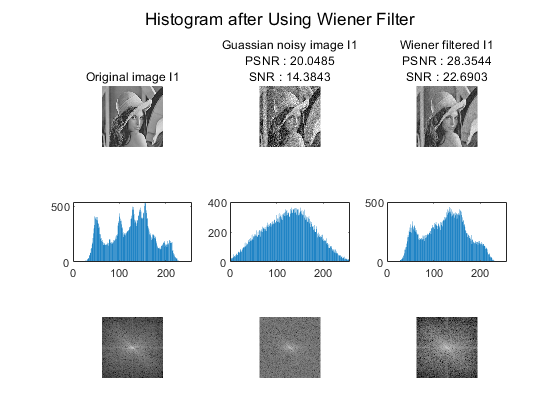

In [102]:
% Wiener filters
restore_img_I1 = wiener_filter(gaussian_I1{1}, I1, gaussian_I1{1} - I1, unmodified_kernal);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);

% Show the results of wiener filters
figure;
sgtitle("Histogram after Using Wiener Filter")
subplot(3, 3, 1); imshow(I1); title("Original image I1");
subplot(3, 3, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ...
    ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 3, 3); imshow(restore_img_I1); title({"Wiener filtered I1", ...
    ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});
subplot(3, 3, 4); bar(imhist(I1));
subplot(3, 3, 5); bar(imhist(gaussian_I1{1}));
subplot(3, 3, 6); bar(imhist(restore_img_I1));
subplot(3, 3, 7); imshow(to_frequency(I1), []);
subplot(3, 3, 8); imshow(to_frequency(gaussian_I1{1}), []);
subplot(3, 3, 9); imshow(to_frequency(restore_img_I1), []);

## 3. Motion blur and Restoration Using Inverse Filter
We apply only the motion blur in this section. We will use **inverse filters** to try to restore the images. We will use the same method as above to assess the result.


### 3.1 Test Inverse Filter Using I1
Try with motion blurred I1 with different Thetas and Lengths of Motion Blur

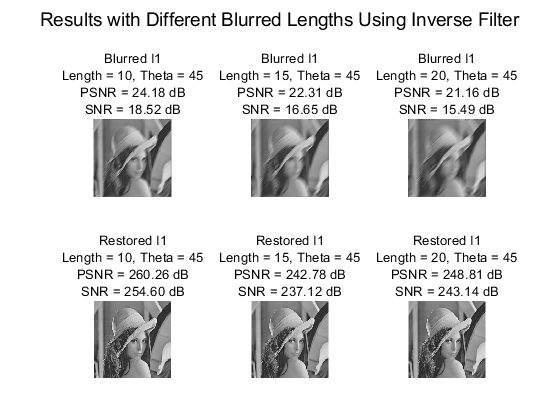

In [103]:
% Define variables
motion_I1_len = cell(length(motion_len), 1);                 % Store images after motion blur
motion_I1_len_snr = zeros(length(motion_len), 2);            % Store PSNR and SNR of blurred images

restored_I1_len = cell(length(motion_len), 1);               % Store restored images
psnr_values_restored_len = zeros(length(motion_len), 1);     % Store PSNR of restored images
snr_values_restored_len = zeros(length(motion_len), 1);      % Store SNR of restored images

% Process for different blur lengths
for i = 1:length(motion_len)
    % Apply motion blur to I1
    motion_I1_len{i} = imfilter(I1, h_motions_len{i}, 'conv', 'same', 'circular');
    
    % Calculate PSNR and SNR for the blurred image
    [motion_I1_len_snr(i, 1), motion_I1_len_snr(i, 2)] = psnr(motion_I1_len{i}, I1);
    
    % Restore image using inverse filtering (based on the blurred image motion_I1_len{i})
    restored_I1_len{i} = inverse_filter(h_motions_len{i}, motion_I1_len{i});
    restored_I1_len{i} = im2double(restored_I1_len{i});
    restored_I1_len{i}(~isfinite(restored_I1_len{i})) = 0;  % Handle infinite values
    
    % Calculate PSNR and SNR for the restored image
    [psnr_values_restored_len(i), snr_values_restored_len(i)] = psnr(restored_I1_len{i}, I1);
end

% Plot blurred images and restoration results
figure;
for i = 1:length(motion_len)
    % Plot blurred images
    subplot(2, length(motion_len), i);
    imshow(motion_I1_len{i});
    title({['Blurred I1'], ['Length = ', num2str(motion_len(i)), ', Theta = 45'], ...
           ['PSNR = ', num2str(motion_I1_len_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR = ', num2str(motion_I1_len_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
end

for i = 1:length(motion_len)
    % Plot restored images
    subplot(2, length(motion_len), i + length(motion_len));
    imshow(restored_I1_len{i});
    title({['Restored I1'], ['Length = ', num2str(motion_len(i)), ', Theta = 45'], ...
           ['PSNR = ', num2str(psnr_values_restored_len(i), '%.2f'), ' dB'], ...
           ['SNR = ', num2str(snr_values_restored_len(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% Add overall title
sgtitle('Results with Different Blurred Lengths Using Inverse Filter', 'FontSize', 14);


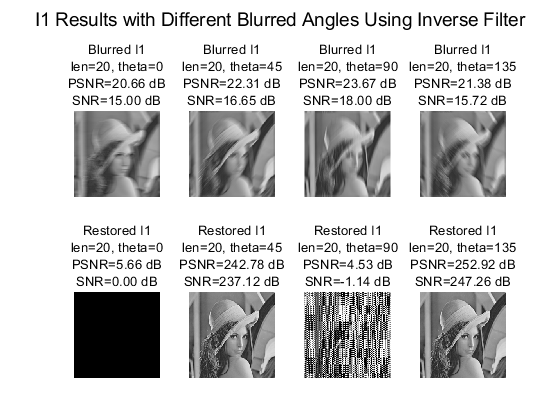

In [104]:
% Define variables for I1 with different thetas
motion_I1_theta = cell(length(motion_theta), 1);                 % Store motion blurred images of I1 (different thetas)
motion_I1_theta_snr = zeros(length(motion_theta), 2);            % Store PSNR and SNR of blurred images of I1

restored_I1_theta = cell(length(motion_theta), 1);               % Store restored images of I1 (different thetas)
psnr_values_restored_theta = zeros(length(motion_theta), 1);     % Store PSNR of restored images
snr_values_restored_theta = zeros(length(motion_theta), 1);      % Store SNR of restored images

% Process different blur angles
for i = 1:length(motion_theta)
    % Apply motion blur to I1 (different thetas)
    motion_I1_theta{i} = imfilter(I1, h_motions_theta{i}, 'conv', 'same', 'circular');
    
    % Calculate PSNR and SNR of the blurred image
    [motion_I1_theta_snr(i, 1), motion_I1_theta_snr(i, 2)] = psnr(motion_I1_theta{i}, I1);
    
    % Restore the image using inverse filtering (based on blurred image motion_I1_theta{i})
    restored_I1_theta{i} = inverse_filter(h_motions_theta{i}, motion_I1_theta{i});
    restored_I1_theta{i} = im2double(restored_I1_theta{i});
    restored_I1_theta{i}(~isfinite(restored_I1_theta{i})) = 0;  % Handle infinite values
    
    % Calculate PSNR and SNR of the restored image
    [psnr_values_restored_theta(i), snr_values_restored_theta(i)] = psnr(restored_I1_theta{i}, I1);
end

% Plot blurred images and restoration results of I1 at different angles (thetas)
figure;
for i = 1:length(motion_theta)
    % Plot blurred images
    subplot(2, length(motion_theta), i);
    imshow(motion_I1_theta{i});
    title({['Blurred I1'], ['len=20, theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(motion_I1_theta_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(motion_I1_theta_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
end

for i = 1:length(motion_theta)
    % Plot restored images
    subplot(2, length(motion_theta), i + length(motion_theta));
    imshow(restored_I1_theta{i});
    title({['Restored I1'], ['len=20, theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(psnr_values_restored_theta(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_theta(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% Add overall title
sgtitle('I1 Results with Different Blurred Angles Using Inverse Filter', 'FontSize', 14);


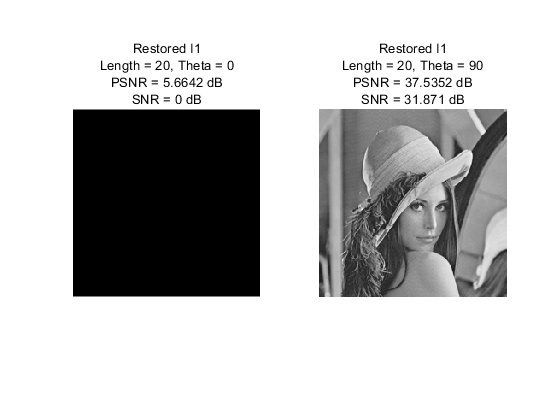

In [105]:
% Plot restored images with special handling for 0 and 90 degrees
figure;

% Restore image for 0 degrees
restored_I1 = inverse_filter(h_motions_theta{1}, motion_I1_theta{1}, 0.9);
restored_I1(~isfinite(restored_I1)) = 0;  % Handle infinite values
[res_psnr, res_snr] = psnr(restored_I1, I1);
subplot(1, 2, 1);
imshow(restored_I1);
title({['Restored I1'], ['Length = 20, Theta = ', num2str(motion_theta(1))], ...
       ['PSNR = ', num2str(res_psnr), ' dB'], ...
       ['SNR = ', num2str(res_snr), ' dB']}, 'FontSize', 10);

% Restore image for 90 degrees
restored_I1 = inverse_filter(h_motions_theta{3}, motion_I1_theta{3}, 0.9);
restored_I1(~isfinite(restored_I1)) = 0;  % Handle infinite values
[res_psnr, res_snr] = psnr(restored_I1, I1);
subplot(1, 2, 2);
imshow(restored_I1);
title({['Restored I1'], ['Length = 20, Theta = ', num2str(motion_theta(3))], ...
       ['PSNR = ', num2str(res_psnr), ' dB'], ...
       ['SNR = ', num2str(res_snr), ' dB']}, 'FontSize', 10);


### 3.2 Test Inverse Filter Using I2
Try with motion blurred I1 with different Thetas and Lengths of Motion Blur

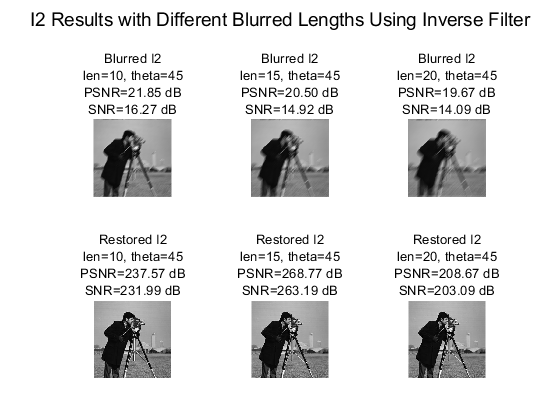

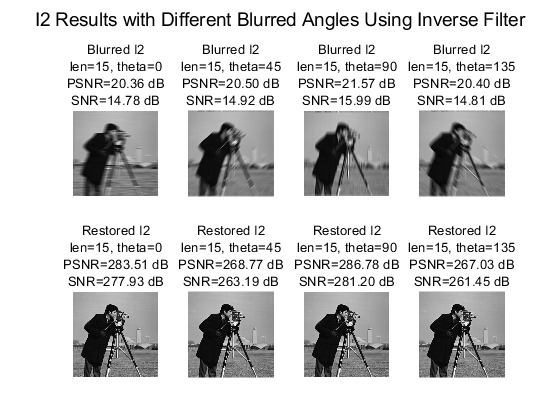

In [106]:
% Define variables for I2
motion_I2_len = cell(length(motion_len), 1);                 % Store motion blurred images of I2
motion_I2_len_snr = zeros(length(motion_len), 2);            % Store PSNR and SNR of blurred images of I2

restored_I2_len = cell(length(motion_len), 1);               % Store restored images of I2
psnr_values_restored_len_I2 = zeros(length(motion_len), 1);  % Store PSNR of restored images of I2
snr_values_restored_len_I2 = zeros(length(motion_len), 1);   % Store SNR of restored images of I2

% Process different blur lengths
for i = 1:length(motion_len)
    % Apply motion blur to I2
    motion_I2_len{i} = imfilter(I2, h_motions_len{i}, 'conv', 'same', 'circular');
    
    % Calculate PSNR and SNR of the blurred image
    [motion_I2_len_snr(i, 1), motion_I2_len_snr(i, 2)] = psnr(motion_I2_len{i}, I2);
    
    % Restore the image using inverse filtering (based on blurred image motion_I2_len{i})
    restored_I2_len{i} = inverse_filter(h_motions_len{i}, motion_I2_len{i});
    restored_I2_len{i} = im2double(restored_I2_len{i});
    restored_I2_len{i}(~isfinite(restored_I2_len{i})) = 0;  % Handle infinite values
    
    % Calculate PSNR and SNR of the restored image
    [psnr_values_restored_len_I2(i), snr_values_restored_len_I2(i)] = psnr(restored_I2_len{i}, I2);
end

% Plot blurred images and restoration results of I2
figure;
for i = 1:length(motion_len)
    % Plot blurred images of I2
    subplot(2, length(motion_len), i);
    imshow(motion_I2_len{i});
    title({['Blurred I2'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(motion_I2_len_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(motion_I2_len_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
end

for i = 1:length(motion_len)
    % Plot restored images of I2
    subplot(2, length(motion_len), i + length(motion_len));
    imshow(restored_I2_len{i});
    title({['Restored I2'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(psnr_values_restored_len_I2(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_len_I2(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% Add overall title
sgtitle('I2 Results with Different Blurred Lengths Using Inverse Filter', 'FontSize', 14);

% Define variables for I2 with different thetas
motion_I2_theta = cell(length(motion_theta), 1);                 % Store motion blurred images of I2 (different thetas)
motion_I2_theta_snr = zeros(length(motion_theta), 2);            % Store PSNR and SNR of blurred images of I2

restored_I2_theta = cell(length(motion_theta), 1);               % Store restored images of I2 (different thetas)
psnr_values_restored_theta_I2 = zeros(length(motion_theta), 1);  % Store PSNR of restored images of I2
snr_values_restored_theta_I2 = zeros(length(motion_theta), 1);   % Store SNR of restored images of I2

% Process different blur angles
for i = 1:length(motion_theta)
    % Apply motion blur to I2 (different thetas)
    motion_I2_theta{i} = imfilter(I2, h_motions_theta{i}, 'conv', 'same', 'circular');
    
    % Calculate PSNR and SNR of the blurred image
    [motion_I2_theta_snr(i, 1), motion_I2_theta_snr(i, 2)] = psnr(motion_I2_theta{i}, I2);
    
    % Restore the image using inverse filtering (based on blurred image motion_I2_theta{i})
    restored_I2_theta{i} = inverse_filter(h_motions_theta{i}, motion_I2_theta{i});
    restored_I2_theta{i} = im2double(restored_I2_theta{i});
    restored_I2_theta{i}(~isfinite(restored_I2_theta{i})) = 0;  % Handle infinite values
    
    % Calculate PSNR and SNR of the restored image
    [psnr_values_restored_theta_I2(i), snr_values_restored_theta_I2(i)] = psnr(restored_I2_theta{i}, I2);
end

% Plot blurred images and restoration results of I2 at different angles (thetas)
figure;
for i = 1:length(motion_theta)
    % Plot blurred images of I2
    subplot(2, length(motion_theta), i);
    imshow(motion_I2_theta{i});
    title({['Blurred I2'], ['len=15, theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(motion_I2_theta_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(motion_I2_theta_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
end

for i = 1:length(motion_theta)
    % Plot restored images of I2
    subplot(2, length(motion_theta), i + length(motion_theta));
    imshow(restored_I2_theta{i});
    title({['Restored I2'], ['len=15, theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(psnr_values_restored_theta_I2(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_theta_I2(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% Add overall title
sgtitle('I2 Results with Different Blurred Angles Using Inverse Filter', 'FontSize', 14);


## 4. Motion blur + Gaussian noise
In this part, the images are motion blurred and then Gaussian Noised. We will use inverse filters and Wiener filters to try to restore the images. We will use the same method as above to assess the result.


### 4.1 Wiener Filter for Different Lengths of Motion Blur


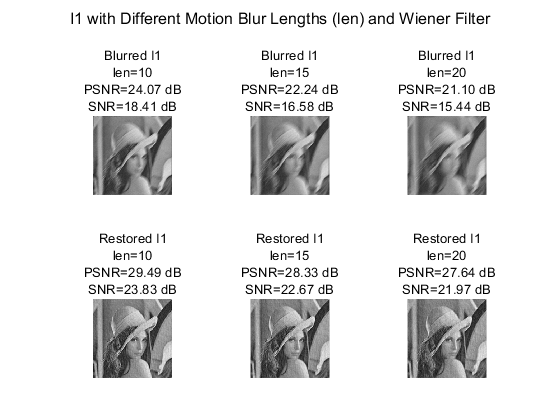

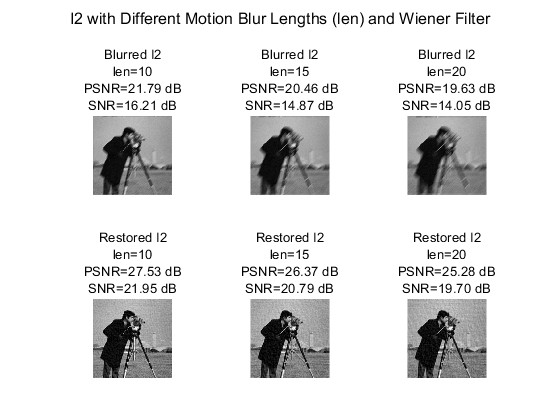

In [107]:
%% -----------------------------I1----------------------------

% Define variables
motion_I1_len = cell(length(motion_len), 1);                      % Store motion blurred images
gaussian_motion_I1_len = cell(length(motion_len), 1);             % Store images with added Gaussian noise
gaussian_motion_I1_len_snr = zeros(length(motion_len), 2);        % Store PSNR and SNR of blurred images
fixed_gaussian_sigma = gaussian_sigma(3);                         % Use the third sigma of Gaussian noise
fixed_gaussian_power = fixed_gaussian_sigma.^2;                   % Noise power
restored_I1_len = cell(length(motion_len), 1);                    % Store restored images
psnr_values_restored_I1_len = zeros(length(motion_len), 1);       % Store PSNR of restored images
snr_values_restored_I1_len = zeros(length(motion_len), 1);        % Store SNR of restored images

h_motions_len = cell(length(motion_len));
for i = 1:length(motion_len)
    h_motions_len{i} = fspecial('motion', motion_len(i), motion_theta(2));
end

% Apply motion blur and add noise
for i = 1:length(motion_len)
    % Apply motion blur to I1
    motion_I1_len{i} = imfilter(I1, h_motions_len{i}, 'conv', 'same', 'circular');
    gaussian_I1 = imnoise(I1, 'gaussian', 0, fixed_gaussian_power); % Add Gaussian noise
    gaussian_motion_I1_len{i} = imnoise(motion_I1_len{i}, 'gaussian', 0, fixed_gaussian_power);
    [gaussian_motion_I1_len_snr(i, 1), gaussian_motion_I1_len_snr(i, 2)] = psnr(gaussian_motion_I1_len{i}, I1); % Calculate PSNR and SNR of the blurred image
    noise_component = gaussian_motion_I1_len{i} - motion_I1_len{i}; % Extract noise component (noise image minus blurred image)
    restored_I1_len{i} = wiener_filter(gaussian_motion_I1_len{i}, I1, noise_component, h_motions_len{i});   % Restore image using Wiener filter
    [psnr_values_restored_I1_len(i), snr_values_restored_I1_len(i)] = psnr(restored_I1_len{i}, I1);         % Calculate PSNR and SNR of restored image
end

% Plot blurred and restored results of I1 with different lengths
figure;
for i = 1:length(motion_len)
    % Display the image with added noise and motion blur
    subplot(2, length(motion_len), i);
    imshow(gaussian_motion_I1_len{i});
    title({['Blurred I1'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(gaussian_motion_I1_len_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(gaussian_motion_I1_len_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
    
    % Display the restored image
    subplot(2, length(motion_len), length(motion_len) + i);
    imshow(restored_I1_len{i});
    title({['Restored I1'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(psnr_values_restored_I1_len(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_I1_len(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% Add overall title for the images
sgtitle('I1 with Different Motion Blur Lengths (len) and Wiener Filter', 'FontSize', 12);

%% -------------------------I2-------------------------------

% Define variables
motion_I2_len = cell(length(motion_len), 1);                      % Store motion blurred images
gaussian_motion_I2_len = cell(length(motion_len), 1);             % Store images with added Gaussian noise
gaussian_motion_I2_len_snr = zeros(length(motion_len), 2);        % Store PSNR and SNR of blurred images
restored_I2_len = cell(length(motion_len), 1);                    % Store restored images
psnr_values_restored_I2_len = zeros(length(motion_len), 1);       % Store PSNR of restored images
snr_values_restored_I2_len = zeros(length(motion_len), 1);        % Store SNR of restored images

h_motions_len = cell(length(motion_len));
for i = 1:length(motion_len)
    h_motions_len{i} = fspecial('motion', motion_len(i), motion_theta(2));  % Fixed angle theta(2)
end

% Apply motion blur and add noise
for i = 1:length(motion_len)
    % Apply motion blur to I2
    motion_I2_len{i} = imfilter(I2, h_motions_len{i}, 'conv', 'same', 'circular');
    gaussian_I2 = imnoise(I2, 'gaussian', 0, fixed_gaussian_power); % Add Gaussian noise
    gaussian_motion_I2_len{i} = imnoise(motion_I2_len{i}, 'gaussian', 0, fixed_gaussian_power);
    [gaussian_motion_I2_len_snr(i, 1), gaussian_motion_I2_len_snr(i, 2)] = psnr(gaussian_motion_I2_len{i}, I2); % Calculate PSNR and SNR of the blurred image
    noise_component = gaussian_motion_I2_len{i} - motion_I2_len{i}; % Extract noise component (noise image minus blurred image)
    restored_I2_len{i} = wiener_filter(gaussian_motion_I2_len{i}, I2, noise_component, h_motions_len{i});   % Restore image using Wiener filter
    [psnr_values_restored_I2_len(i), snr_values_restored_I2_len(i)] = psnr(restored_I2_len{i}, I2);         % Calculate PSNR and SNR of restored image
end

% Plot blurred and restored results of I2 with different lengths
figure;
for i = 1:length(motion_len)
    % Display the image with added noise and motion blur
    subplot(2, length(motion_len), i);
    imshow(gaussian_motion_I2_len{i});
    title({['Blurred I2'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(gaussian_motion_I2_len_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(gaussian_motion_I2_len_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
    
    % Display the restored image
    subplot(2, length(motion_len), length(motion_len) + i);
    imshow(restored_I2_len{i});
    title({['Restored I2'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(psnr_values_restored_I2_len(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_I2_len(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% Add overall title for the images
sgtitle('I2 with Different Motion Blur Lengths (len) and Wiener Filter', 'FontSize', 12);


### 4.2 Wiener Filter for Different Angles of Motion Blur


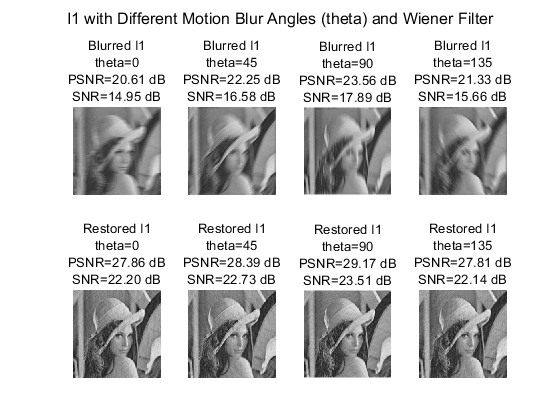

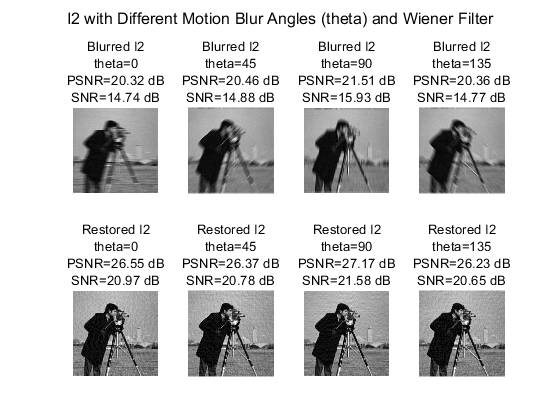

In [108]:
% Define variables
motion_I1_theta = cell(length(motion_theta), 1);                  % Store motion blurred images
gaussian_motion_I1_theta = cell(length(motion_theta), 1);         % Store images with added Gaussian noise
gaussian_motion_I1_theta_snr = zeros(length(motion_theta), 2);    % Store PSNR and SNR of blurred images
restored_I1_theta = cell(length(motion_theta), 1);                % Store restored images
psnr_values_restored_I1_theta = zeros(length(motion_theta), 1);   % Store PSNR of restored images
snr_values_restored_I1_theta = zeros(length(motion_theta), 1);    % Store SNR of restored images

h_motions_theta = cell(length(motion_theta));
for i = 1:length(motion_theta)
    h_motions_theta{i} = fspecial('motion', motion_len(2), motion_theta(i));  % Fixed length len(2)
end

% Apply motion blur and add noise
for i = 1:length(motion_theta)
    % Apply motion blur to I1
    motion_I1_theta{i} = imfilter(I1, h_motions_theta{i}, 'conv', 'same', 'circular');
    gaussian_I1 = imnoise(I1, 'gaussian', 0, fixed_gaussian_power); % Add Gaussian noise
    gaussian_motion_I1_theta{i} = imnoise(motion_I1_theta{i}, 'gaussian', 0, fixed_gaussian_power);
    [gaussian_motion_I1_theta_snr(i, 1), gaussian_motion_I1_theta_snr(i, 2)] = psnr(gaussian_motion_I1_theta{i}, I1); % Calculate PSNR and SNR of blurred images
    noise_component = gaussian_motion_I1_theta{i} - motion_I1_theta{i}; % Extract noise component (noise image minus blurred image)
    restored_I1_theta{i} = wiener_filter(gaussian_motion_I1_theta{i}, I1, noise_component, h_motions_theta{i}); % Restore image using Wiener filter
    [psnr_values_restored_I1_theta(i), snr_values_restored_I1_theta(i)] = psnr(restored_I1_theta{i}, I1);       % Calculate PSNR and SNR of restored images
end

% Plot blurred and restored results for I1 with different theta
figure;
for i = 1:length(motion_theta)
    % Display images with added noise and motion blur
    subplot(2, length(motion_theta), i);
    imshow(gaussian_motion_I1_theta{i});
    title({['Blurred I1'], ['theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(gaussian_motion_I1_theta_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(gaussian_motion_I1_theta_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
    
    % Display restored images
    subplot(2, length(motion_theta), length(motion_theta) + i);
    imshow(restored_I1_theta{i});
    title({['Restored I1'], ['theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(psnr_values_restored_I1_theta(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_I1_theta(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% Add a main title for the images
sgtitle('I1 with Different Motion Blur Angles (theta) and Wiener Filter', 'FontSize', 12);


%% -----------------------I2----------------------------

% Define variables
motion_I2_theta = cell(length(motion_theta), 1);                  % Store motion blurred images
gaussian_motion_I2_theta = cell(length(motion_theta), 1);         % Store images with added Gaussian noise
gaussian_motion_I2_theta_snr = zeros(length(motion_theta), 2);    % Store PSNR and SNR of blurred images
restored_I2_theta = cell(length(motion_theta), 1);                % Store restored images
psnr_values_restored_I2_theta = zeros(length(motion_theta), 1);   % Store PSNR of restored images
snr_values_restored_I2_theta = zeros(length(motion_theta), 1);    % Store SNR of restored images

h_motions_theta = cell(length(motion_theta));
for i = 1:length(motion_theta)
    h_motions_theta{i} = fspecial('motion', motion_len(2), motion_theta(i));  % Fixed length len(2)
end

% Apply motion blur and add noise
for i = 1:length(motion_theta)
    % Apply motion blur to I2
    motion_I2_theta{i} = imfilter(I2, h_motions_theta{i}, 'conv', 'same', 'circular');
    gaussian_I2 = imnoise(I2, 'gaussian', 0, fixed_gaussian_power); % Add Gaussian noise
    gaussian_motion_I2_theta{i} = imnoise(motion_I2_theta{i}, 'gaussian', 0, fixed_gaussian_power);
    [gaussian_motion_I2_theta_snr(i, 1), gaussian_motion_I2_theta_snr(i, 2)] = psnr(gaussian_motion_I2_theta{i}, I2); % Calculate PSNR and SNR of blurred images
    noise_component = gaussian_motion_I2_theta{i} - motion_I2_theta{i}; % Extract noise component (noise image minus blurred image)
    restored_I2_theta{i} = wiener_filter(gaussian_motion_I2_theta{i}, I2, noise_component, h_motions_theta{i}); % Restore image using Wiener filter
    [psnr_values_restored_I2_theta(i), snr_values_restored_I2_theta(i)] = psnr(restored_I2_theta{i}, I2);       % Calculate PSNR and SNR of restored images
end

% Plot blurred and restored results for I2 with different theta
figure;
for i = 1:length(motion_theta)
    % Display images with added noise and motion blur
    subplot(2, length(motion_theta), i);
    imshow(gaussian_motion_I2_theta{i});
    title({['Blurred I2'], ['theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(gaussian_motion_I2_theta_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(gaussian_motion_I2_theta_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
    
    % Display restored images
    subplot(2, length(motion_theta), length(motion_theta) + i);
    imshow(restored_I2_theta{i});
    title({['Restored I2'], ['theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(psnr_values_restored_I2_theta(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_I2_theta(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% Add a main title for the images
sgtitle('I2 with Different Motion Blur Angles (theta) and Wiener Filter', 'FontSize', 12);


5. State-of-the-art algorithms
We will use the state-of-the-art algorithms to restore the images, comparing the result with those generated previously, and discuss why the state-of-the-art algorithms perform better.
